<a href="https://colab.research.google.com/github/priyadarshini-silpa/caption-generator/blob/main/caption_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

model_name = "bipin/image-caption-generator"

# load model
model = VisionEncoderDecoderModel.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained("gpt2")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [ ]:
img_name = "/content/football.jpg"
img = Image.open(img_name)
if img.mode != 'RGB':
    img = img.convert(mode="RGB")


In [ ]:
pixel_values = feature_extractor(images=[img], return_tensors="pt").pixel_values
pixel_values = pixel_values.to(device)


A man in a red shirt kicks a soccer ball in front of a crowd of people.


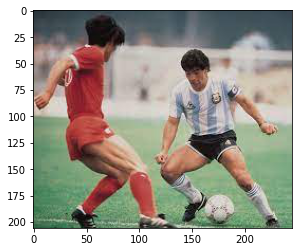

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/football.jpg'))
max_length = 128
num_beams = 4

# get model prediction
output_ids = model.generate(pixel_values, num_beams=num_beams, max_length=max_length)

# decode the generated prediction
preds = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(preds)
